In [9]:
import nasdaqdatalink as ndl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

In [10]:
t_data = ndl.get("WIKI/T")
tm_data = ndl.get("WIKI/TMUS")
vz_data = ndl.get("WIKI/VZ")
t_data.to_csv("T.csv")
tm_data.to_csv("TMUS.csv")
vz_data.to_csv("VZ.csv")

# AT&T

In [11]:
att_data = pd.read_csv("T.csv")
att_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1984-07-19,59.75,59.87,59.38,59.38,77900.0,0.0,1.0,1.275248,1.277809,1.267351,1.267351,934800.0
1,1984-07-20,59.62,60.00,59.25,59.50,129800.0,0.0,1.0,1.272474,1.280584,1.264577,1.269913,1557600.0
2,1984-07-23,59.25,59.75,58.75,59.50,276100.0,0.0,1.0,1.264577,1.275248,1.253905,1.269913,3313200.0
3,1984-07-24,59.75,60.38,59.62,60.00,129100.0,0.0,1.0,1.275248,1.288694,1.272474,1.280584,1549200.0
4,1984-07-25,60.00,61.37,59.87,60.75,152400.0,0.0,1.0,1.280584,1.309824,1.277809,1.296591,1828800.0


In [12]:
att_data['Daily Change'] = att_data['Close'] - att_data['Open']
att_data['Percent Daily Change'] = att_data['Daily Change'] / att_data['Open'] * 100
att_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,1984-07-19,59.75,59.87,59.38,59.38,77900.0,0.0,1.0,1.275248,1.277809,1.267351,1.267351,934800.0,-0.37,-0.619247
1,1984-07-20,59.62,60.00,59.25,59.50,129800.0,0.0,1.0,1.272474,1.280584,1.264577,1.269913,1557600.0,-0.12,-0.201275
2,1984-07-23,59.25,59.75,58.75,59.50,276100.0,0.0,1.0,1.264577,1.275248,1.253905,1.269913,3313200.0,0.25,0.421941
3,1984-07-24,59.75,60.38,59.62,60.00,129100.0,0.0,1.0,1.275248,1.288694,1.272474,1.280584,1549200.0,0.25,0.418410
4,1984-07-25,60.00,61.37,59.87,60.75,152400.0,0.0,1.0,1.280584,1.309824,1.277809,1.296591,1828800.0,0.75,1.250000


In [13]:
# splits a column of dates in the format YYYY-MM-DD into three columns in the formats YYYY, MM, and DD
def splitDates(df):
    # splitting the values in the Date column
    dates = df['Date'].str.split("-")
    df['Date'] = dates
    
    # Iterating through the dates, putting years, months, and days in their respective lists
    yearList = []
    monthList = []
    dayList = []
    for date in dates:
        yearList.append(int(date[0]))
        monthList.append(int(date[1]))
        dayList.append(int(date[2]))
    # Converting the lists to Series
    years = pd.Series(yearList)
    months = pd.Series(monthList)
    days = pd.Series(dayList)
    # Dropping the old Date column
    df = df.drop(columns="Date")
    # Adding the new columns
    df['Year'] = years
    df['Month'] = months
    df['Day'] = days
    
    # moving the date back to the front of the dataframe
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    cols = cols[-1:] + cols[:-1]
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    return df

In [14]:
# att_data = splitDates(att_data)
# att_data

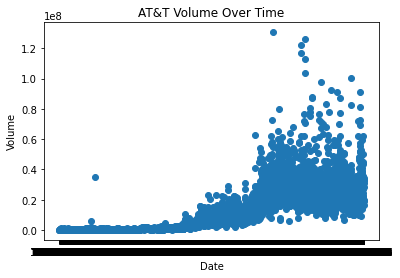

In [15]:
plt.scatter(att_data["Date"], att_data['Volume'])
plt.title("AT&T Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

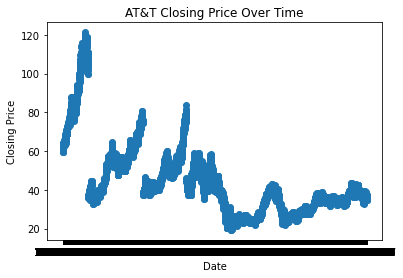

In [16]:
plt.scatter(att_data["Date"], att_data['Close'])
plt.title("AT&T Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

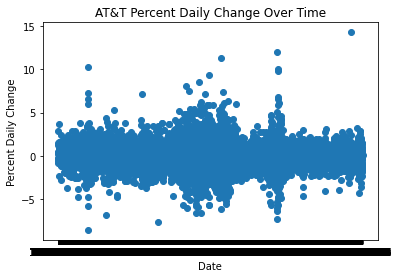

In [17]:
plt.scatter(att_data['Date'], att_data['Percent Daily Change'])
plt.title("AT&T Percent Daily Change Over Time")
plt.xlabel("Date")
plt.ylabel("Percent Daily Change")
plt.show()

# T-Mobile

In [ ]:
tmobile_data = pd.read_csv("TMUS.csv")
tmobile_data.head()

In [19]:
tmobile_data['Daily Change'] = tmobile_data['Close'] - tmobile_data['Open']
tmobile_data['Percent Daily Change'] = tmobile_data['Daily Change'] / tmobile_data['Open'] * 100
tmobile_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,2007-04-19,25.10,27.61,24.50,27.40,31724800.0,0.0,1.0,33.684159,37.052575,32.878960,36.770755,15862400.0,2.30,9.163347
1,2007-04-20,27.40,28.80,27.10,28.55,6109400.0,0.0,1.0,36.770755,38.649553,36.368156,38.314054,3054700.0,1.15,4.197080
2,2007-04-23,28.60,28.94,28.29,28.75,3752800.0,0.0,1.0,38.381154,38.837433,37.965134,38.582453,1876400.0,0.15,0.524476
3,2007-04-24,28.51,29.40,28.51,29.20,3065800.0,0.0,1.0,38.260374,39.454752,38.260374,39.186353,1532900.0,0.69,2.420203
4,2007-04-25,29.55,29.75,28.51,28.61,2450600.0,0.0,1.0,39.656052,39.924452,38.260374,38.394574,1225300.0,-0.94,-3.181049


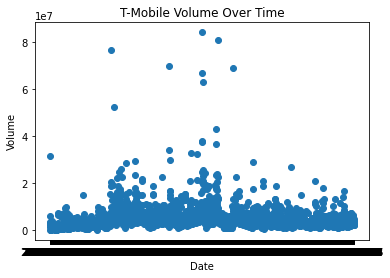

In [20]:
plt.scatter(tmobile_data["Date"], tmobile_data["Volume"])
plt.title("T-Mobile Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

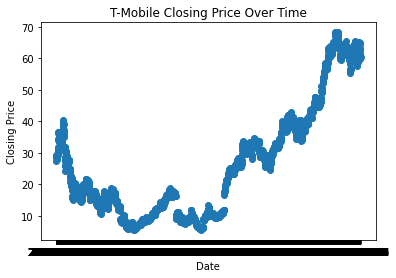

In [21]:
plt.scatter(tmobile_data["Date"], tmobile_data["Close"])
plt.title("T-Mobile Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

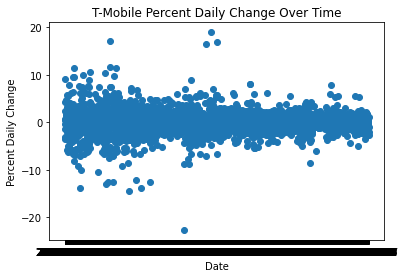

In [22]:
plt.scatter(tmobile_data['Date'], tmobile_data['Percent Daily Change'])
plt.title("T-Mobile Percent Daily Change Over Time")
plt.xlabel("Date")
plt.ylabel("Percent Daily Change")
plt.show()

# Verizon

In [ ]:
verizon_data = pd.read_csv("VZ.csv")
verizon_data.head()

In [24]:
verizon_data['Daily Change'] = verizon_data['Close'] - verizon_data['Open']
verizon_data['Percent Daily Change'] = verizon_data['Daily Change'] / verizon_data['Open'] * 100
verizon_data.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Change,Percent Daily Change
0,1983-11-21,70.62,70.75,65.62,70.25,627575.0,0.0,1.0,1.649837,1.652874,1.533026,1.641193,5020600.0,-0.37,-0.523931
1,1983-11-22,70.25,71.25,69.87,70.00,333338.0,0.0,1.0,1.641193,1.664556,1.632316,1.635353,2666704.0,-0.25,-0.355872
2,1983-11-23,70.00,70.25,69.25,69.62,143988.0,0.0,1.0,1.635353,1.641193,1.617831,1.626475,1151904.0,-0.38,-0.542857
3,1983-11-25,69.62,69.75,68.87,68.87,221475.0,0.0,1.0,1.626475,1.629512,1.608954,1.608954,1771800.0,-0.75,-1.077277
4,1983-11-28,68.50,68.50,66.75,67.00,295975.0,0.0,1.0,1.600310,1.600310,1.559426,1.565266,2367800.0,-1.50,-2.189781


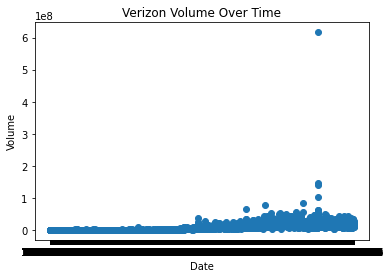

In [25]:
plt.scatter(verizon_data["Date"], verizon_data["Volume"])
plt.title("Verizon Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

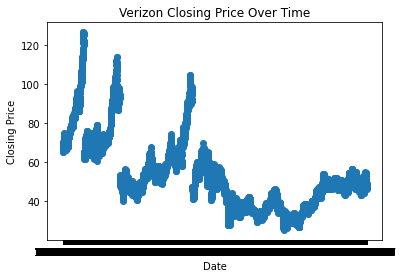

In [26]:
plt.scatter(verizon_data["Date"], verizon_data["Close"])
plt.title("Verizon Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

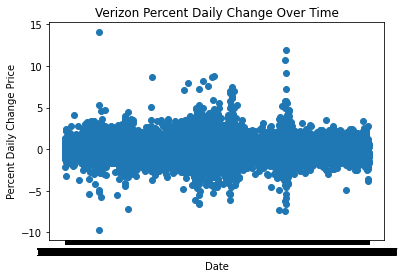

In [27]:
plt.scatter(verizon_data['Date'], verizon_data['Percent Daily Change'])
plt.title("Verizon Percent Daily Change Over Time")
plt.xlabel("Date")
plt.ylabel("Percent Daily Change Price")
plt.show()

# The Great Recession

In [28]:
great_recession_t = ndl.get('WIKI/T', start_date="2007-01-01", end_date="2013-01-01")
great_recession_t = great_recession_t.reset_index()
great_recession_tm = ndl.get('WIKI/TMUS', start_date="2007-01-01", end_date="2013-01-01")
great_recession_tm = great_recession_tm.reset_index()
great_recession_vz = ndl.get('WIKI/VZ', start_date="2007-01-01", end_date="2013-01-01")
great_recession_vz = great_recession_vz.reset_index()

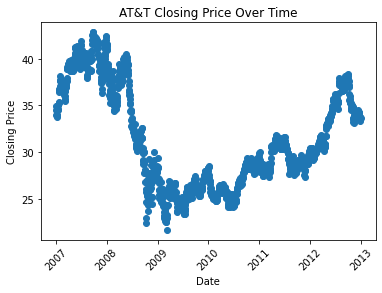

In [32]:
plt.scatter(great_recession_t["Date"], great_recession_t['Close'])
plt.xticks(rotation=45)
plt.title("AT&T Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

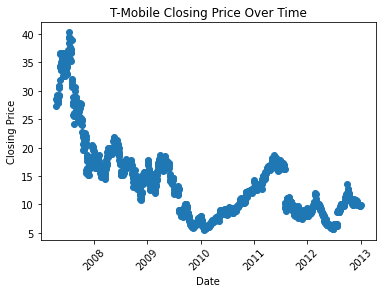

In [33]:
plt.scatter(great_recession_tm["Date"], great_recession_tm['Close'])
plt.xticks(rotation=45)
plt.title("T-Mobile Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

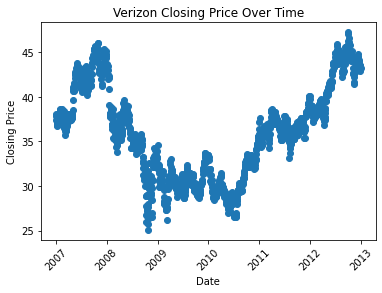

In [34]:
plt.scatter(great_recession_vz["Date"], great_recession_vz['Close'])
plt.xticks(rotation=45)
plt.title("Verizon Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()